In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/train.csv")
df

,img_id,complexity,question,answer,original,question_class
0,clb0kvxvm90y4074yf50vf5nq,3,"Are there any abnormalities, polyps, or anatom...",Evidence of oesophagitis is present with no po...,"[\n{\n""q"": ""Are there any abnormalities in the...",['abnormality_presence' 'polyp_type' 'landmark...
1,cl8k2u1r71foz083278j63qnm,2,What procedure is depicted in the image and wh...,Evidence of a colonoscopy with a paris iia pol...,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type' 'polyp_type']
2,cl8k2u1qa1ekz08324rek2qcv,3,"Have all polyps been removed, is there any tex...","Polyps remain present, text is visible, and th...","[\n{\n""q"": ""Have all polyps been removed?"",\n""...",['polyp_removal_status' 'text_presence' 'abnor...
3,cla820gmss67b071u3h7o5k3t,3,"Are there any surgical instruments, polyps, or...","No surgical instruments or polyps are visible,...","[\n{\n""q"": ""How many instrumnets are in the im...",['instrument_count' 'polyp_count' 'finding_cou...
4,clb0kvxvf90l4074y85pi02pq,1,Are there any medical devices visible in the i...,No foreign bodies or instruments identified,"[\n{\n""q"": ""Are there any instruments in the i...",['instrument_presence']
...,...,...,...,...,...,...
143589,clb0lbwybdnz8086u24pid7l7,1,What procedure is depicted in the image?,evidence of colonoscopy procedure,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type']
143590,clb0lbx03dpyg086u4g58d4qc,2,Are there any green or black box artifacts and...,evidence of green and black box artifacts with...,"[\n{\n""q"": ""Is there a green/black box artefac...",['box_artifact_presence' 'text_presence']
143591,clb0kvxwp92k8074ybz5l790g,1,In which regions of the image is the abnormali...,scattered across multiple quadrants including ...,"[\n{\n""q"": ""Where in the image is the abnormal...",['abnormality_location']
143592,clb0kvxwo92hs074y8p8h4lm3,2,Identify the anatomical landmark and assess fo...,"No anatomical landmark identified, with eviden...","[\n{\n""q"": ""Where in the image is the anatomic...",['landmark_location' 'abnormality_presence']


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def norm_text(text, keep_num = False, keep_alphabet = True):
    text = text.lower()
    
    text = text.replace("/", " ")
    text = text.replace("?", " ")
    text = text.replace(".", " ")
    text = text.replace(",", " ")
    
    if not keep_num:
        text = re.sub(r"\d+", "", text)
    
    if keep_alphabet:
        text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = " ".join(text.split())
    return text

# to deep learning format (remove stopwords + lemmatize)
def to_deep_learning(text):
    stop_words = set(stopwords.words("english"))
    white_list = ["what", "when", "where", "why", "any", "how", "if", "more"]
    stop_words.difference_update(white_list)
    
    words = text.split()
    words = [w for w in words if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
sort_dict = lambda x: dict(reversed(sorted(x.items(), key=lambda item: item[1])))

# Question

In [5]:
df["norm_question"] = df["question"].apply(norm_text)
df["dl_question"] = df["norm_question"].apply(to_deep_learning)

In [6]:
df

,img_id,complexity,question,answer,original,question_class,norm_question,dl_question
0,clb0kvxvm90y4074yf50vf5nq,3,"Are there any abnormalities, polyps, or anatom...",Evidence of oesophagitis is present with no po...,"[\n{\n""q"": ""Are there any abnormalities in the...",['abnormality_presence' 'polyp_type' 'landmark...,are there any abnormalities polyps or anatomic...,any abnormality polyp anatomical landmark visi...
1,cl8k2u1r71foz083278j63qnm,2,What procedure is depicted in the image and wh...,Evidence of a colonoscopy with a paris iia pol...,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type' 'polyp_type'],what procedure is depicted in the image and wh...,what procedure depicted image what type polyp ...
2,cl8k2u1qa1ekz08324rek2qcv,3,"Have all polyps been removed, is there any tex...","Polyps remain present, text is visible, and th...","[\n{\n""q"": ""Have all polyps been removed?"",\n""...",['polyp_removal_status' 'text_presence' 'abnor...,have all polyps been removed is there any text...,polyp removed any text present where abnormali...
3,cla820gmss67b071u3h7o5k3t,3,"Are there any surgical instruments, polyps, or...","No surgical instruments or polyps are visible,...","[\n{\n""q"": ""How many instrumnets are in the im...",['instrument_count' 'polyp_count' 'finding_cou...,are there any surgical instruments polyps or a...,any surgical instrument polyp abnormal finding...
4,clb0kvxvf90l4074y85pi02pq,1,Are there any medical devices visible in the i...,No foreign bodies or instruments identified,"[\n{\n""q"": ""Are there any instruments in the i...",['instrument_presence'],are there any medical devices visible in the i...,any medical device visible image
...,...,...,...,...,...,...,...,...
143589,clb0lbwybdnz8086u24pid7l7,1,What procedure is depicted in the image?,evidence of colonoscopy procedure,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type'],what procedure is depicted in the image,what procedure depicted image
143590,clb0lbx03dpyg086u4g58d4qc,2,Are there any green or black box artifacts and...,evidence of green and black box artifacts with...,"[\n{\n""q"": ""Is there a green/black box artefac...",['box_artifact_presence' 'text_presence'],are there any green or black box artifacts and...,any green black box artifact visible text image
143591,clb0kvxwp92k8074ybz5l790g,1,In which regions of the image is the abnormali...,scattered across multiple quadrants including ...,"[\n{\n""q"": ""Where in the image is the abnormal...",['abnormality_location'],in which regions of the image is the abnormali...,region image abnormality located
143592,clb0kvxwo92hs074y8p8h4lm3,2,Identify the anatomical landmark and assess fo...,"No anatomical landmark identified, with eviden...","[\n{\n""q"": ""Where in the image is the anatomic...",['landmark_location' 'abnormality_presence'],identify the anatomical landmark and assess fo...,identify anatomical landmark assess any abnorm...


ulcerative colitis = viêm loét đại tràng <br/>
esophagitis = viêm thực quản <br/>
polyp = khối u nhỏ <br/>

In [7]:
question_word_counts = dict({})

for q in tqdm(df["dl_question"]):
    words = q.split()
    unique_words, counts = np.unique(words, return_counts = True)
    for word, count in zip(unique_words, counts):
        question_word_counts[word] = question_word_counts.get(word, 0) + count
    

100%|██████████| 143594/143594 [00:04<00:00, 35178.91it/s]


In [8]:
question_word_counts = sort_dict(question_word_counts)

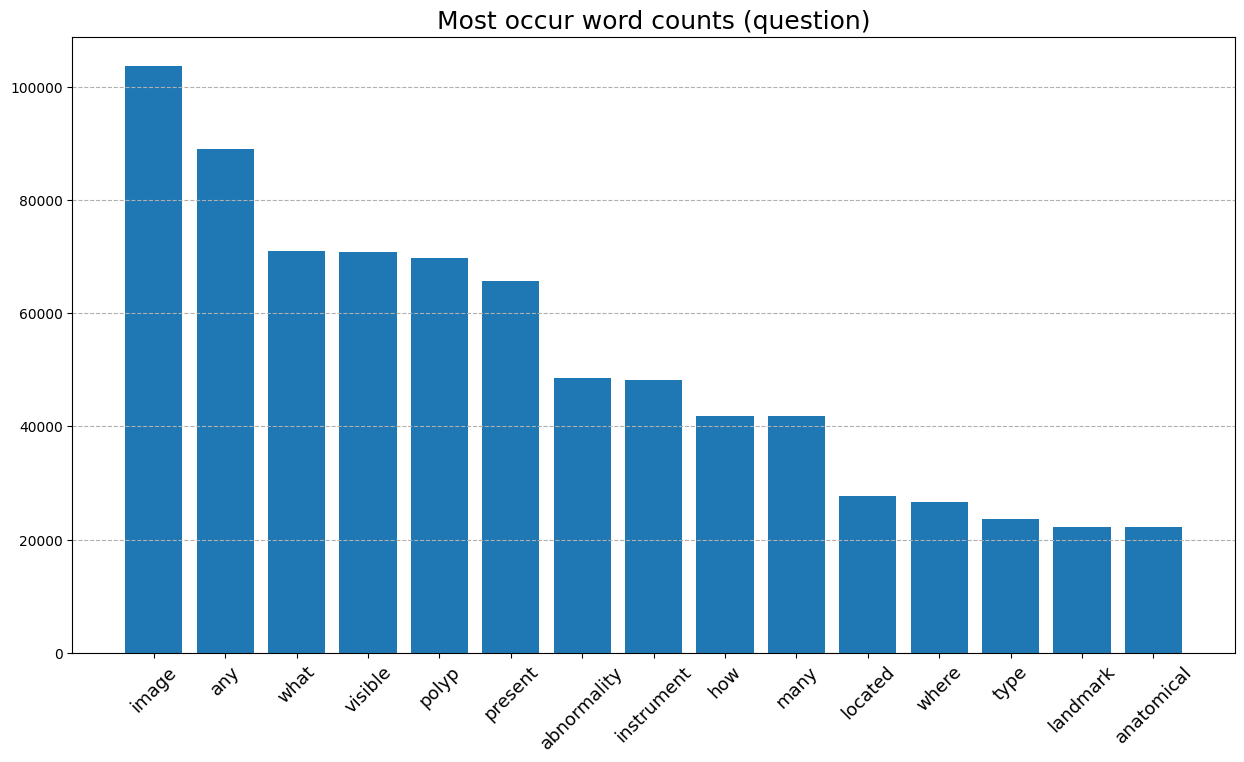

In [89]:
val = []
name = []

for i, (k, v) in enumerate(question_word_counts.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Most occur word counts (question)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.grid(linestyle = "--", axis = "y")
plt.show()

polyp = khối u <br/>
anatomical = giải phẫu

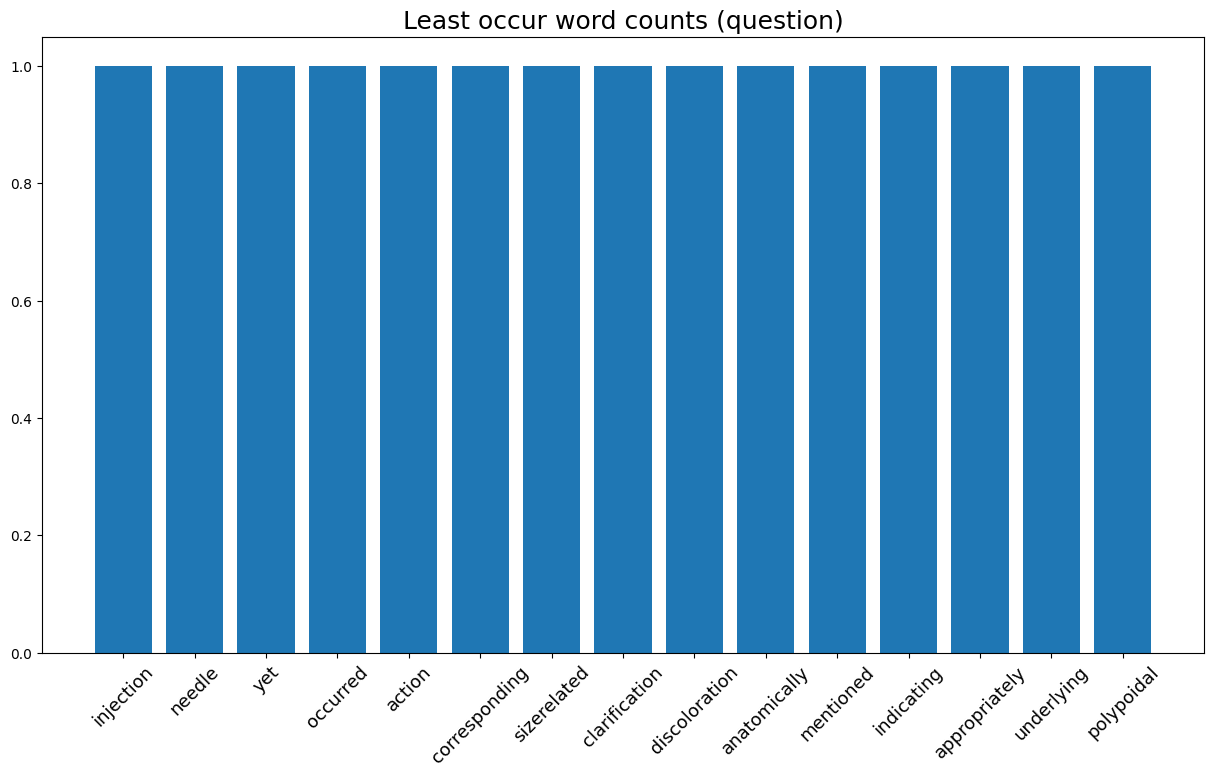

In [10]:
val = []
name = []

for i, (k, v) in enumerate(reversed(question_word_counts.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Least occur word counts (question)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

# Question (ngram = [2, 3])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer2 = CountVectorizer(
    analyzer = "word",
    ngram_range = (2, 2)
)

count_vectorizer3 = CountVectorizer(
    analyzer = "word",
    ngram_range = (3, 3)
)

count_vectorizer2.fit(df["dl_question"])
count_vectorizer3.fit(df["dl_question"])

CountVectorizer(ngram_range=(3, 3))

In [12]:
count_ngram2 = count_vectorizer2.transform(df["dl_question"])
count_ngram3 = count_vectorizer2.transform(df["dl_question"])

In [13]:
count_ngram2 = count_ngram2.toarray()
count_ngram3 = count_ngram3.toarray()

In [14]:
count_ngram2 = count_ngram2.sum(axis = 0)
count_ngram3 = count_ngram3.sum(axis = 0)

In [15]:
count_ngram2 = dict(zip(count_vectorizer2.get_feature_names_out(), count_ngram2))
count_ngram3 = dict(zip(count_vectorizer3.get_feature_names_out(), count_ngram3))

In [16]:
count_ngram2 = sort_dict(count_ngram2)
count_ngram3 = sort_dict(count_ngram3)

# Ngram = 2

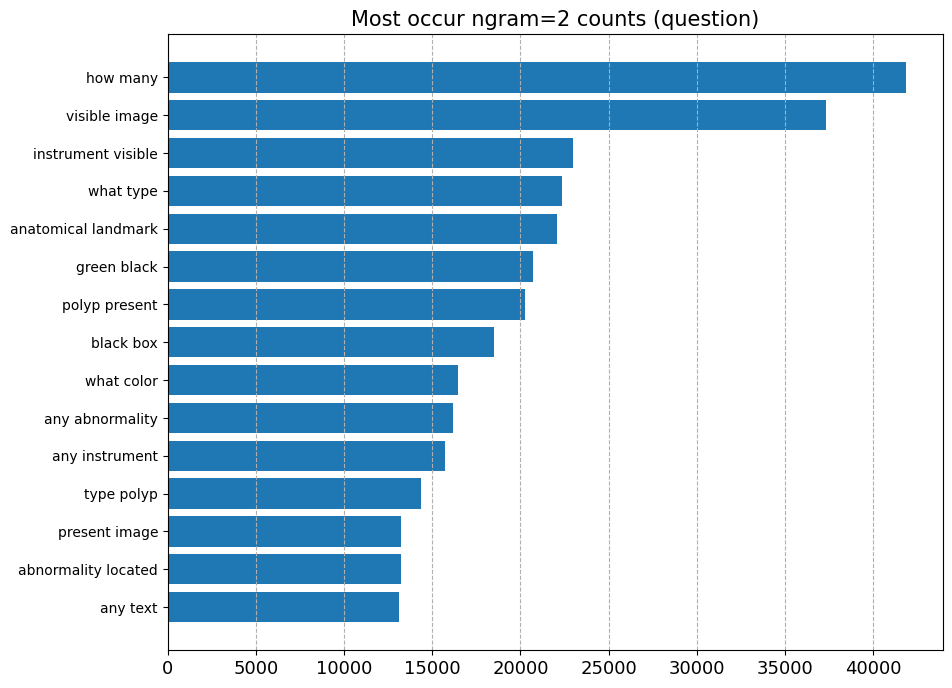

In [87]:
val = []
name = []

for i, (k, v) in enumerate(count_ngram2.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Most occur ngram=2 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.grid(linestyle = "--", axis = "x")
plt.show()

aterfact = hiện vật

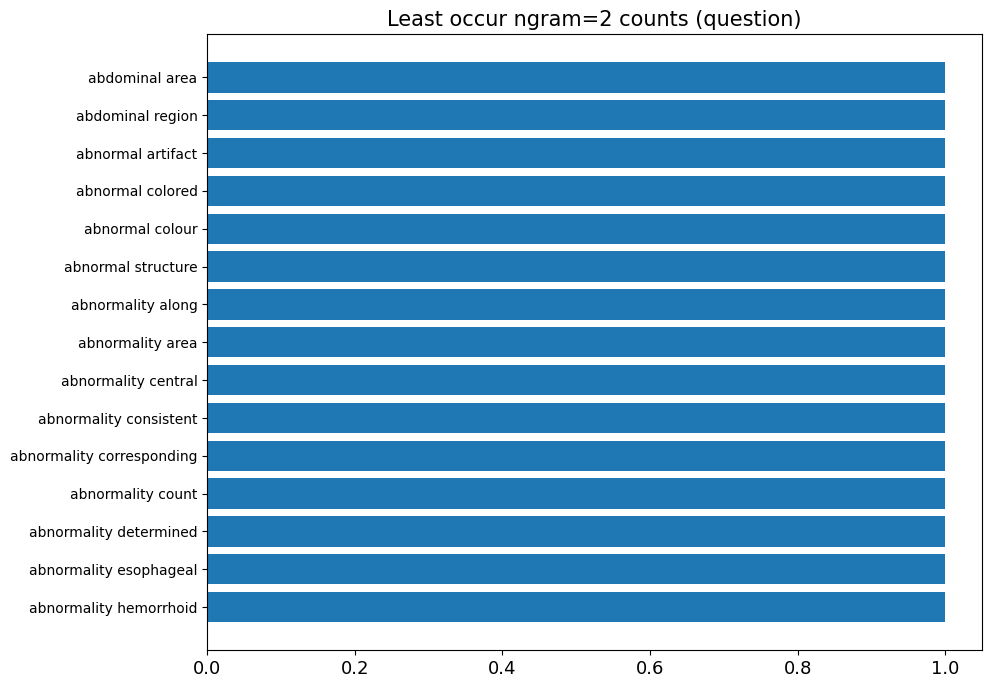

In [18]:
val = []
name = []

for i, (k, v) in enumerate(reversed(count_ngram2.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Least occur ngram=2 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

# Ngram = 3

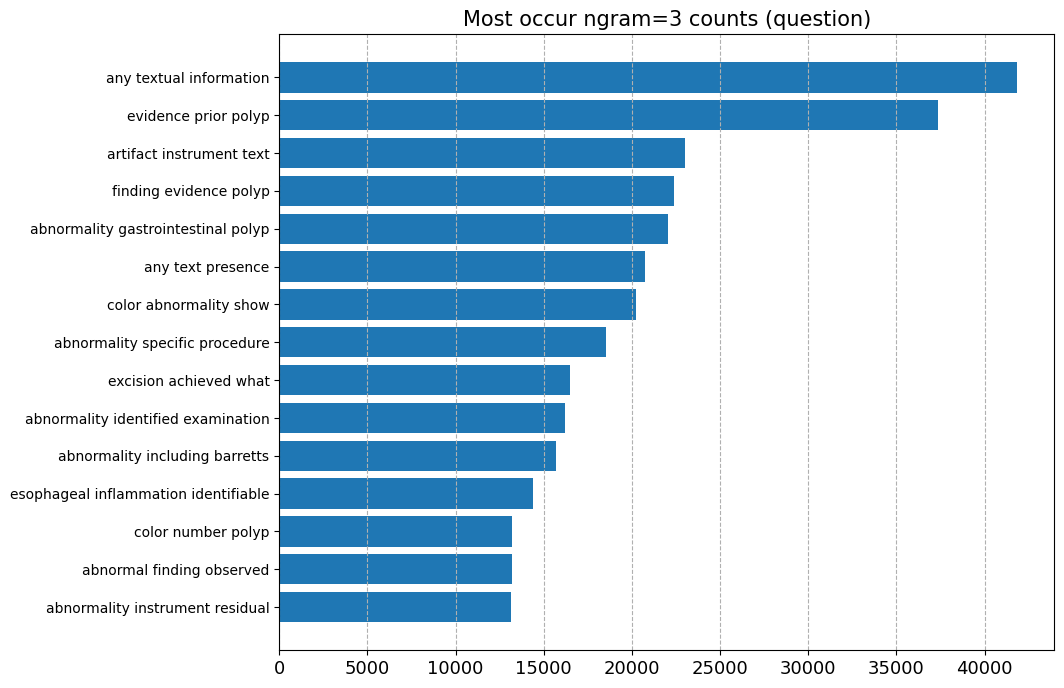

In [86]:
val = []
name = []

for i, (k, v) in enumerate(count_ngram3.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Most occur ngram=3 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.grid(linestyle = "--", axis = "x")
plt.show()

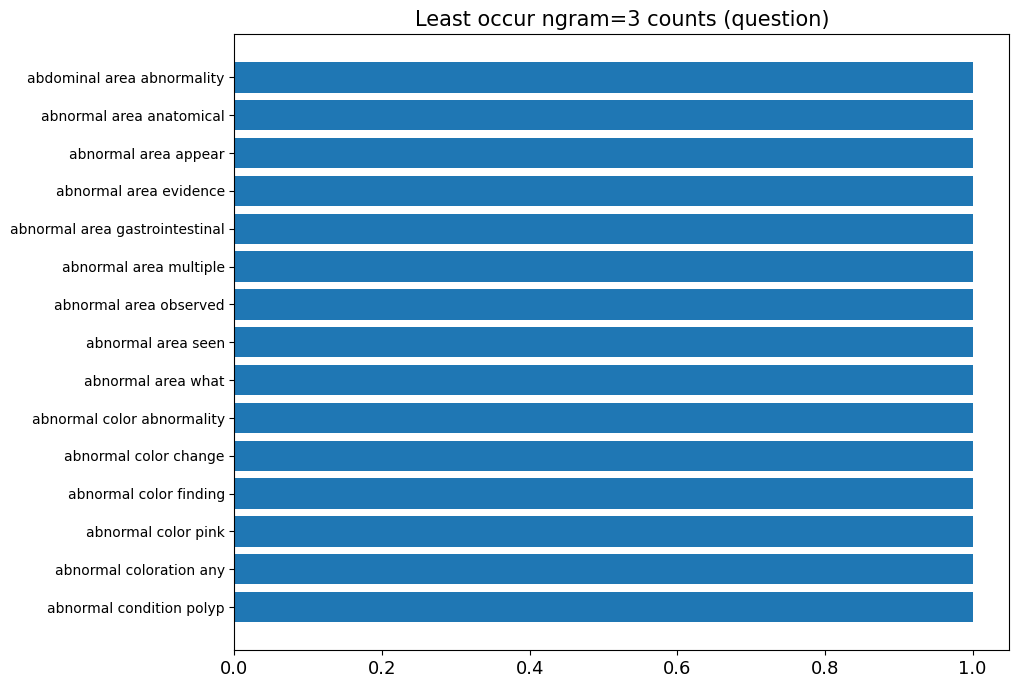

In [20]:
val = []
name = []

for i, (k, v) in enumerate(reversed(count_ngram3.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
val = list(reversed(val))
name = list(reversed(name))
    
plt.figure(figsize = (10, 8))
plt.title("Least occur ngram=3 counts (question)", fontsize = 15)
plt.barh(name, val)
plt.xticks(fontsize = 13)
plt.show()

# Answer

In [21]:
df["answer"] = df["answer"].apply(str)
df["norm_answer"] = df["answer"].apply(lambda x: norm_text(x, keep_num = True))

In [22]:
df

,img_id,complexity,question,answer,original,question_class,norm_question,dl_question,norm_answer
0,clb0kvxvm90y4074yf50vf5nq,3,"Are there any abnormalities, polyps, or anatom...",Evidence of oesophagitis is present with no po...,"[\n{\n""q"": ""Are there any abnormalities in the...",['abnormality_presence' 'polyp_type' 'landmark...,are there any abnormalities polyps or anatomic...,any abnormality polyp anatomical landmark visi...,evidence of oesophagitis is present with no po...
1,cl8k2u1r71foz083278j63qnm,2,What procedure is depicted in the image and wh...,Evidence of a colonoscopy with a paris iia pol...,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type' 'polyp_type'],what procedure is depicted in the image and wh...,what procedure depicted image what type polyp ...,evidence of a colonoscopy with a paris iia pol...
2,cl8k2u1qa1ekz08324rek2qcv,3,"Have all polyps been removed, is there any tex...","Polyps remain present, text is visible, and th...","[\n{\n""q"": ""Have all polyps been removed?"",\n""...",['polyp_removal_status' 'text_presence' 'abnor...,have all polyps been removed is there any text...,polyp removed any text present where abnormali...,polyps remain present text is visible and the ...
3,cla820gmss67b071u3h7o5k3t,3,"Are there any surgical instruments, polyps, or...","No surgical instruments or polyps are visible,...","[\n{\n""q"": ""How many instrumnets are in the im...",['instrument_count' 'polyp_count' 'finding_cou...,are there any surgical instruments polyps or a...,any surgical instrument polyp abnormal finding...,no surgical instruments or polyps are visible ...
4,clb0kvxvf90l4074y85pi02pq,1,Are there any medical devices visible in the i...,No foreign bodies or instruments identified,"[\n{\n""q"": ""Are there any instruments in the i...",['instrument_presence'],are there any medical devices visible in the i...,any medical device visible image,no foreign bodies or instruments identified
...,...,...,...,...,...,...,...,...,...
143589,clb0lbwybdnz8086u24pid7l7,1,What procedure is depicted in the image?,evidence of colonoscopy procedure,"[\n{\n""q"": ""What type of procedure is the imag...",['procedure_type'],what procedure is depicted in the image,what procedure depicted image,evidence of colonoscopy procedure
143590,clb0lbx03dpyg086u4g58d4qc,2,Are there any green or black box artifacts and...,evidence of green and black box artifacts with...,"[\n{\n""q"": ""Is there a green/black box artefac...",['box_artifact_presence' 'text_presence'],are there any green or black box artifacts and...,any green black box artifact visible text image,evidence of green and black box artifacts with...
143591,clb0kvxwp92k8074ybz5l790g,1,In which regions of the image is the abnormali...,scattered across multiple quadrants including ...,"[\n{\n""q"": ""Where in the image is the abnormal...",['abnormality_location'],in which regions of the image is the abnormali...,region image abnormality located,scattered across multiple quadrants including ...
143592,clb0kvxwo92hs074y8p8h4lm3,2,Identify the anatomical landmark and assess fo...,"No anatomical landmark identified, with eviden...","[\n{\n""q"": ""Where in the image is the anatomic...",['landmark_location' 'abnormality_presence'],identify the anatomical landmark and assess fo...,identify anatomical landmark assess any abnorm...,no anatomical landmark identified with evidenc...


In [23]:
answer_word_counts = dict({})

for q in df["norm_answer"]:
    words = q.split()
    unique_words, counts = np.unique(words, return_counts = True)
    for word, count in zip(unique_words, counts):
        answer_word_counts[word] = answer_word_counts.get(word, 0) + count

In [24]:
answer_word_counts = sort_dict(answer_word_counts)

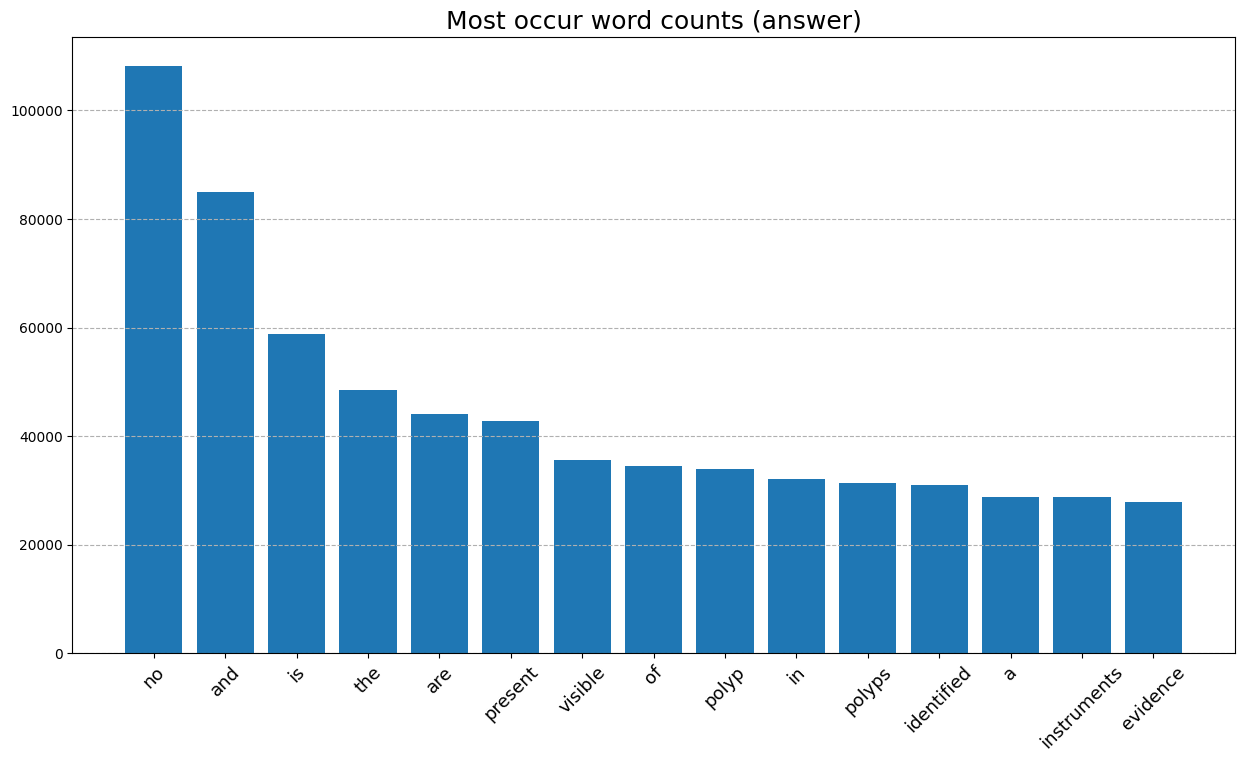

In [85]:
val = []
name = []

for i, (k, v) in enumerate(answer_word_counts.items()):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Most occur word counts (answer)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.grid(linestyle = "--", axis = "y")
plt.show()

colonoscopy = nội soi

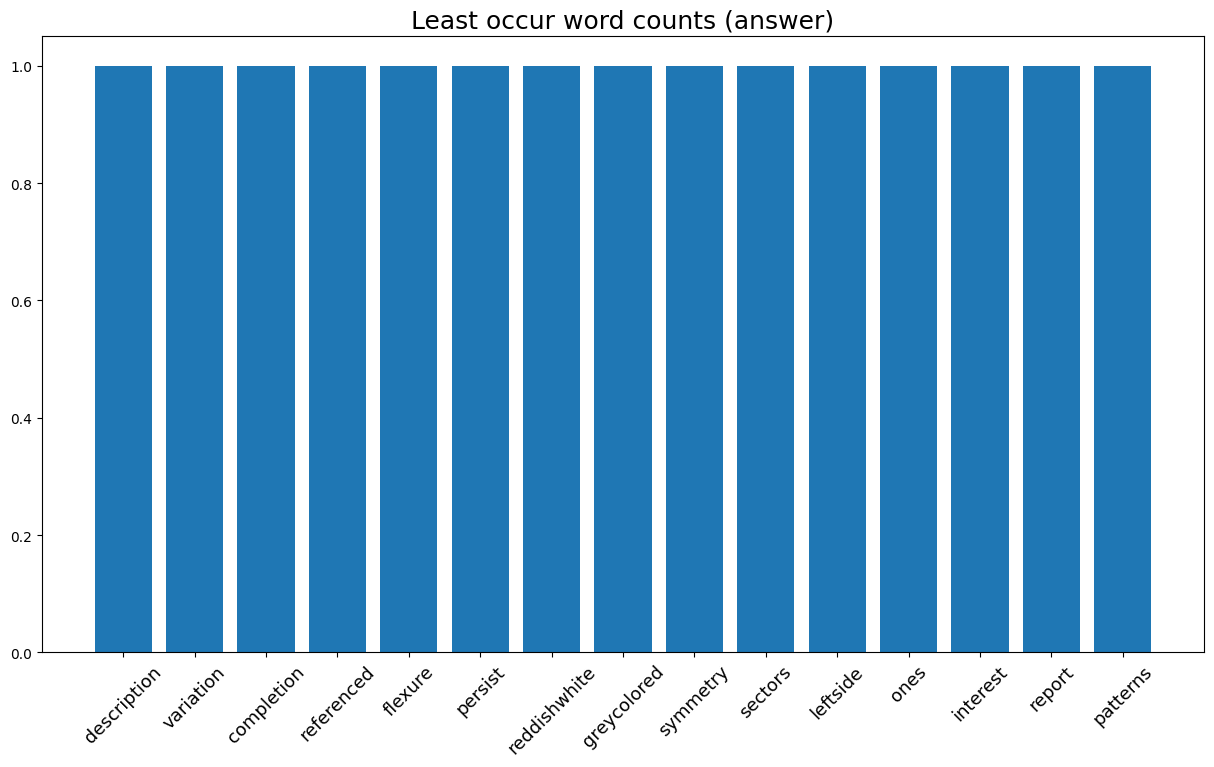

In [26]:
val = []
name = []

for i, (k, v) in enumerate(reversed(answer_word_counts.items())):
    if i == 15:
        break
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Least occur word counts (answer)", fontsize = 18)
plt.bar(name, val)
plt.xticks(rotation = 45, fontsize = 13)
plt.show()

# More into question and answer

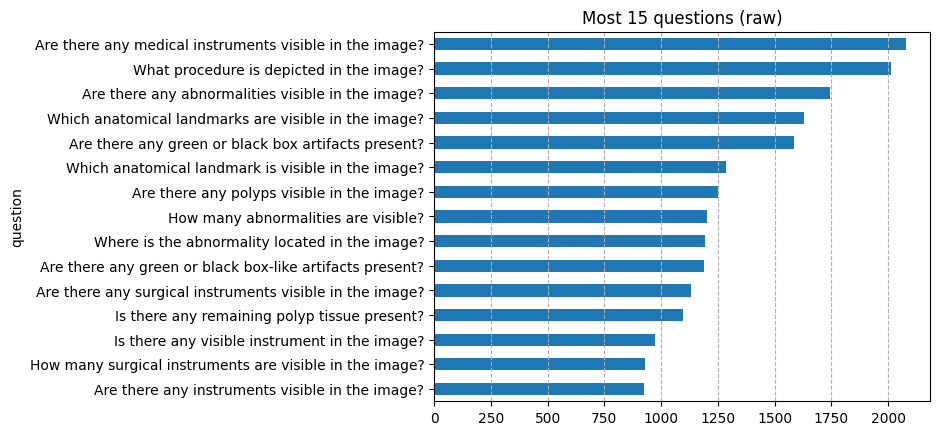

In [84]:
plt.title("Most 15 questions (raw)")
df["question"].value_counts()[:15:][::-1].plot(kind = "barh")
plt.grid(linestyle = "--", axis = "x")
plt.show()

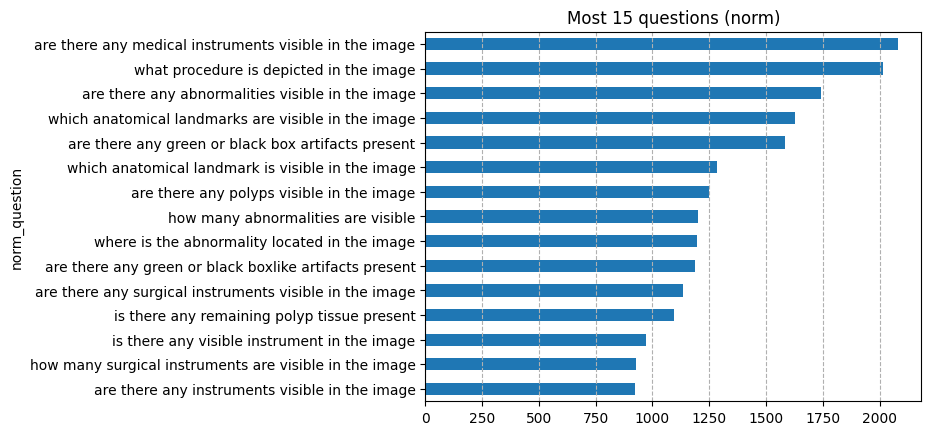

In [83]:
plt.title("Most 15 questions (norm)")
df["norm_question"].value_counts()[:15:][::-1].plot(kind = "barh")
plt.grid(linestyle = "--", axis = "x")
plt.show()

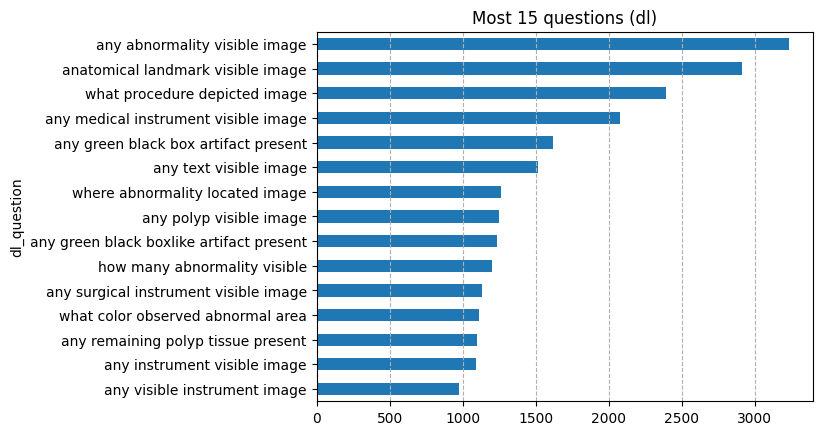

In [82]:
plt.title("Most 15 questions (dl)")
df["dl_question"].value_counts()[:15:][::-1].plot(kind = "barh")
plt.grid(linestyle = "--", axis = "x")
plt.show()

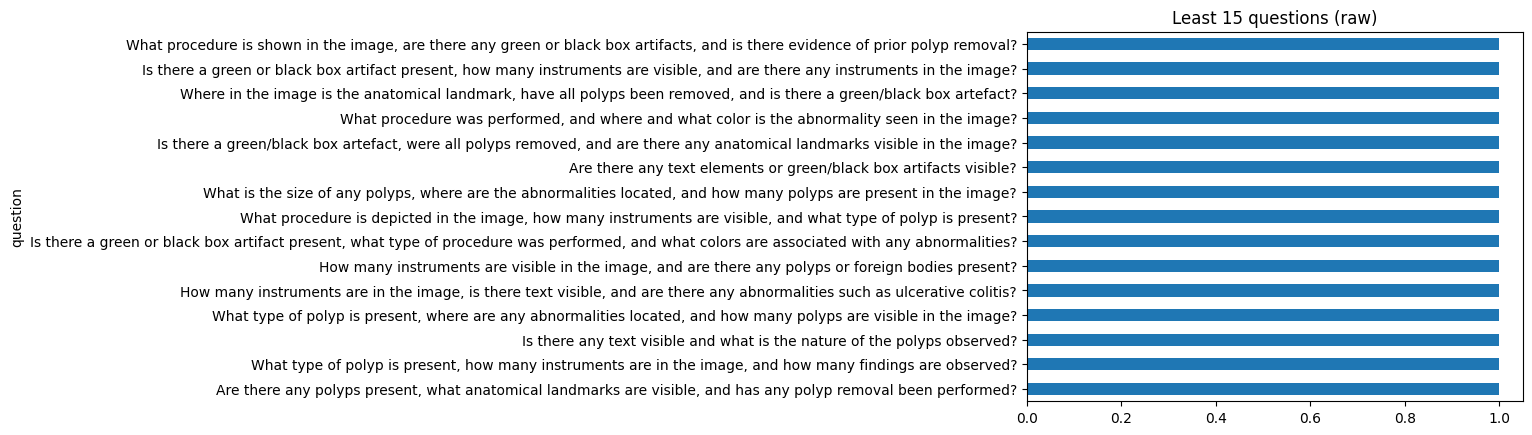

In [81]:
plt.title("Least 15 questions (raw)")
df["question"].value_counts()[-15::][::-1].plot(kind = "barh")
plt.show()

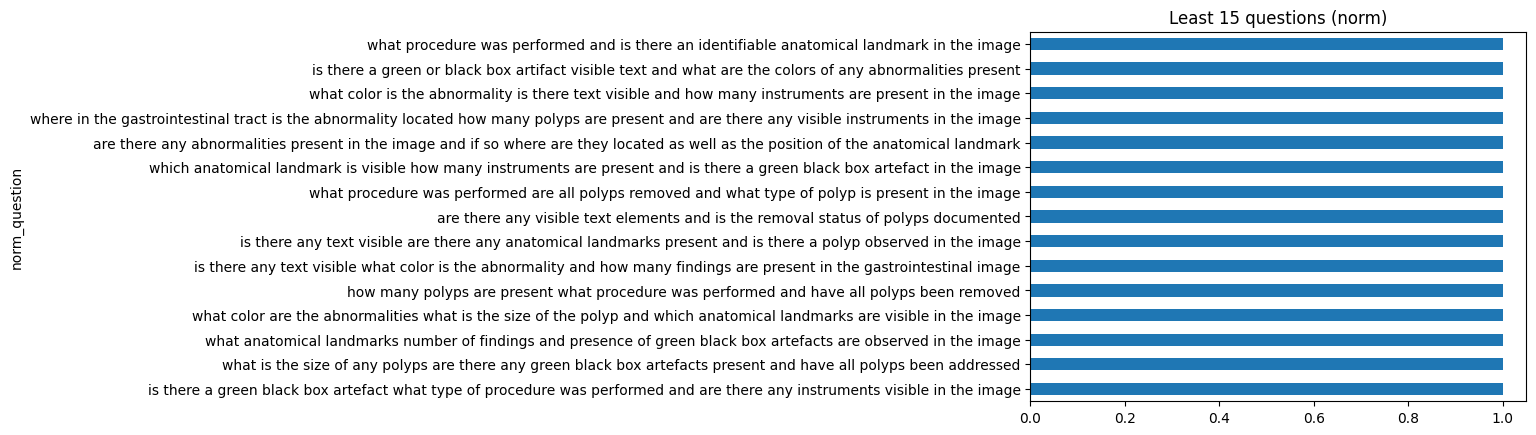

In [80]:
plt.title("Least 15 questions (norm)")
df["norm_question"].value_counts()[-15::][::-1].plot(kind = "barh")
plt.show()

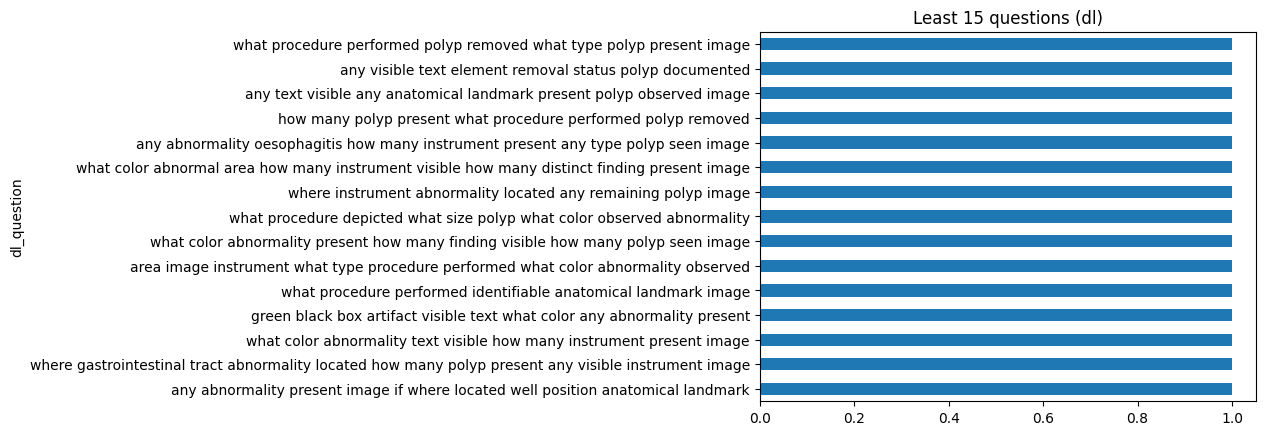

In [79]:
plt.title("Least 15 questions (dl)")
df["dl_question"].value_counts()[-15::][::-1].plot(kind = "barh")
plt.show()

In [36]:
print("Num of unique question:", len(df["dl_question"].unique()))

Num of unique question: 30755


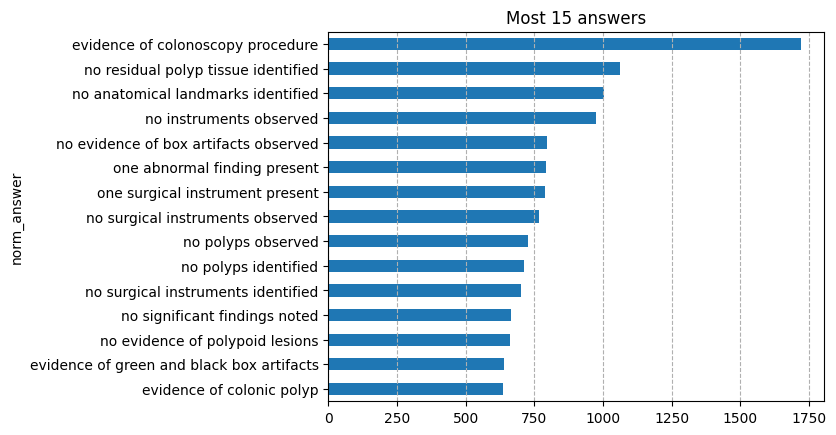

In [76]:
plt.title("Most 15 answers")
df["norm_answer"].value_counts()[:15:][::-1].plot(kind = "barh")
plt.grid(linestyle = "--", axis = "x")
plt.show()

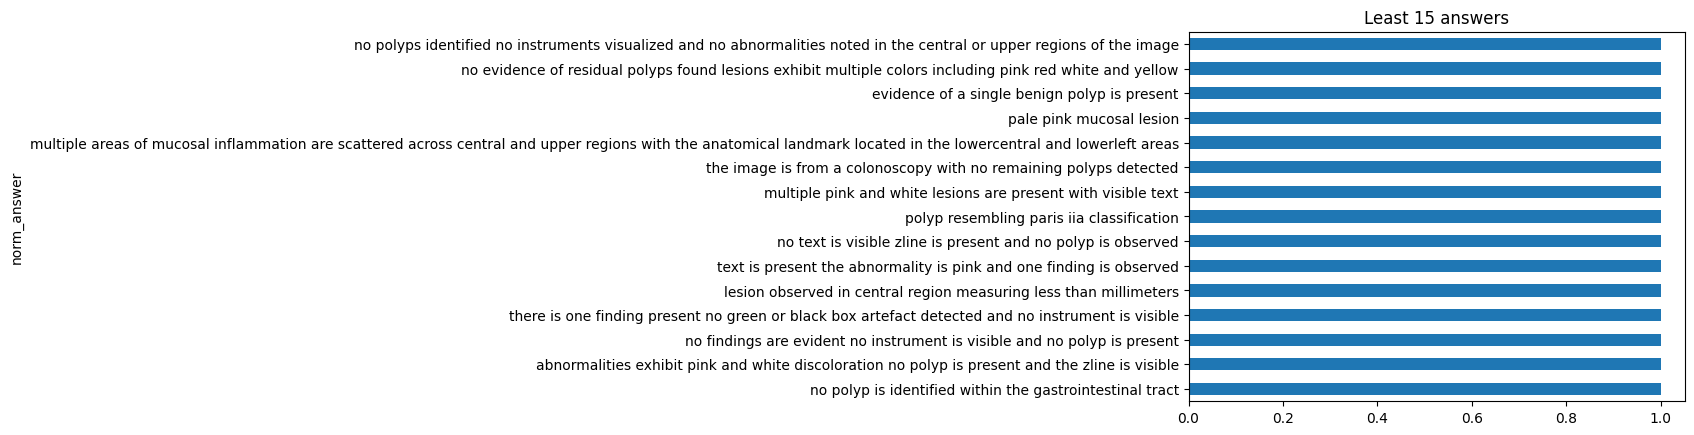

In [78]:
plt.title("Least 15 answers")
df["norm_answer"].value_counts()[-15::][::-1].plot(kind = "barh")
plt.show()

In [39]:
unique_ques = list(df["norm_question"].value_counts().index)
unique_ans_ = list(df["norm_answer"].value_counts().index)
unique_ans = list(map(str, unique_ans_))

Text(0.5, 0, 'Num questions')

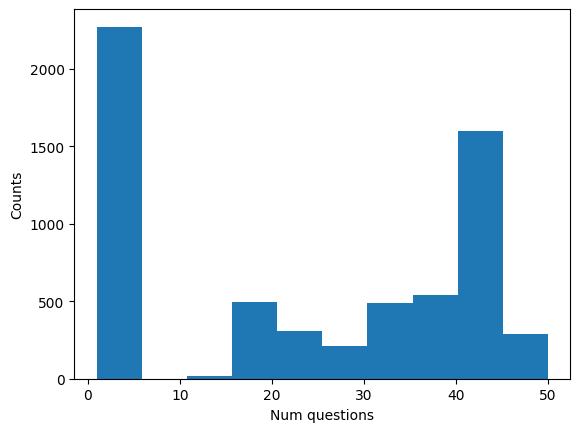

In [103]:
df["img_id"].value_counts().plot(kind = "hist", bins = 10)
plt.ylabel("Counts")
plt.xlabel("Num questions")

# Question class

In [56]:
str_to_list = lambda s: s.strip("[]").replace("'", "").split()

In [62]:
df["question_class"] = df["question_class"].apply(str_to_list)

In [63]:
question_class_counts = dict({})
for cl in tqdm(df["question_class"]):
    for c in cl:
        question_class_counts[c] = question_class_counts.get(c, 0) + 1

100%|██████████| 143594/143594 [00:00<00:00, 971872.06it/s]


In [67]:
question_class_counts = sort_dict(question_class_counts)

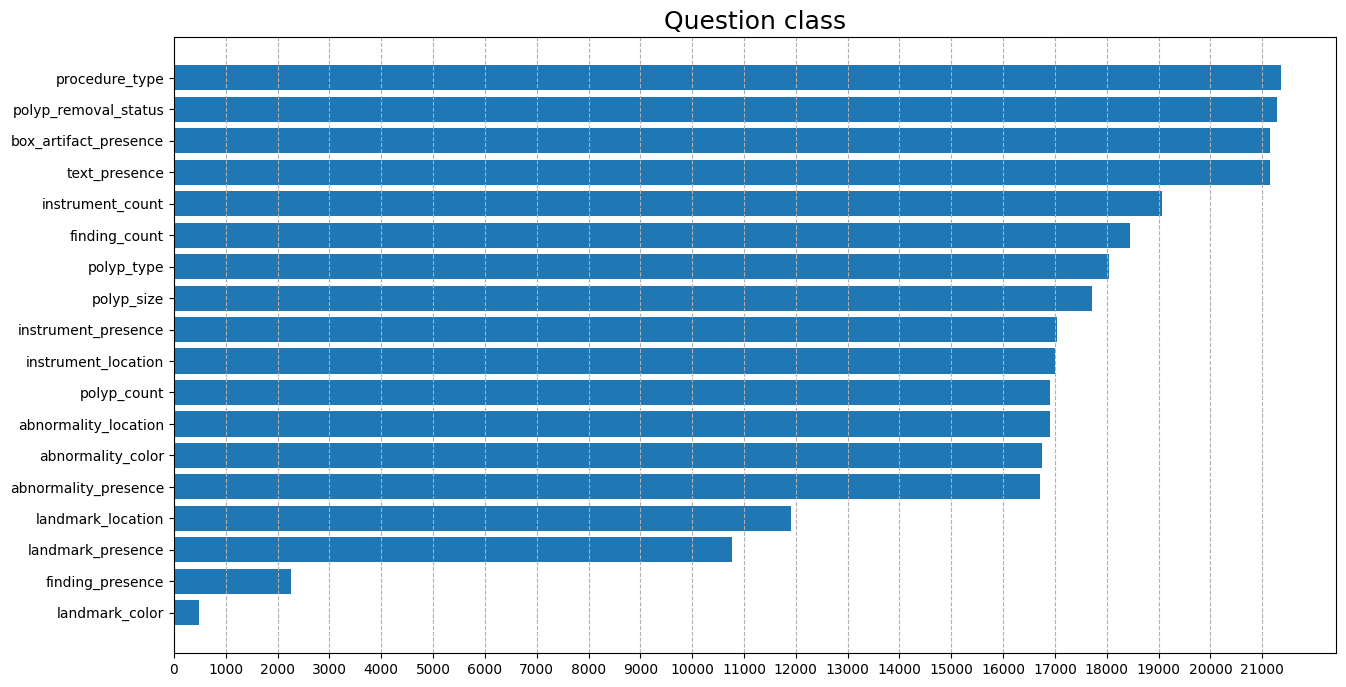

In [75]:
val = []
name = []

for i, (k, v) in enumerate(reversed(question_class_counts.items())):
    val.append(v)
    name.append(k)
    
plt.figure(figsize = (15, 8))
plt.title("Question class", fontsize = 18)
plt.barh(name, val)
plt.xticks(range(0, max(val), 1000))
plt.grid(linestyle = "--", axis = "x")
plt.show()

# Complexity

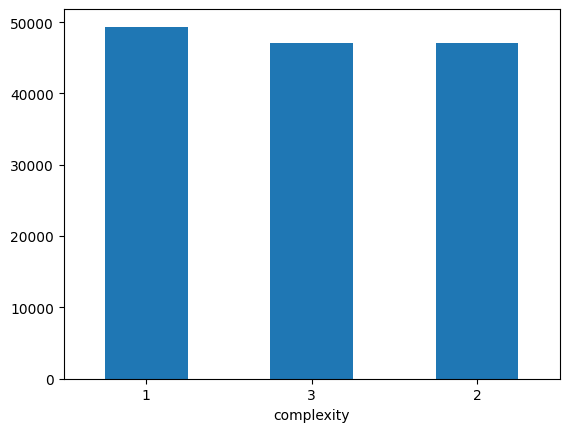

In [101]:
df["complexity"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()

# Save

In [69]:
df.to_csv("data/preprocessed_train.csv", index = False)